# Read in Data

In [10]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# inline plotting
% matplotlib inline

In [ ]:
cd downloads

In [108]:
# read in training sample files 
import csv
bbs = pd.read_csv('bbs-train.txt')
imgs = pd.read_csv('imgs-train.txt')
label = pd.read_csv('label-train.txt')
list = pd.read_csv('list-train.txt')

In [128]:
from sklearn.cluster import KMeans
from scipy.cluster.vq import *
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist

#dataframe
df_imgs = np.loadtxt('imgs-train.txt', delimiter = ' ')
df_label = np.loadtxt('label-train.txt')
df_label = df_label[:,1]
df_imgs = df_imgs.astype(np.float32)
df_label = df_label.astype(np.float32)
df_imgs = pd.DataFrame(df_imgs)
df_imgs
df_label = pd.DataFrame(df_label)
df_label
df = pd.concat([df_imgs, df_label], axis=1)

df.shape

(4546, 721)

# Exploring Dimensionality Reduction Using Principle Component Analysis 

In [117]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

In [130]:
import numpy as np
from matplotlib.mlab import PCA

data = np.array(np.random.randint(10,size=(10,3)))
results = PCA(data)


In [131]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
df_label = stdsc.fit_transform(df_label)

In [132]:
df_label = pca.fit_transform(df_label)

Text(0.5,1,'Principal Components:  Cumulative Explained Variance Ratio')

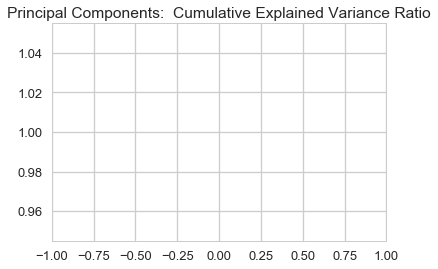

In [136]:
# obtain feature importances
pca_var_explained = pca.explained_variance_ratio_ 
feature_labels = df_label

# cumulative sum of explained ration
cumulative_var_explained = np.cumsum(pca_var_explained)

# cumulative distribution function for principle componets
# based on explained variance ratio
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
sns.set_context('talk')

plt.plot(range(df_label.shape[1]), cumulative_var_explained)
plt.xlim([-1, df_label.shape[1]])
plt.title('Principal Components:  Cumulative Explained Variance Ratio')

# Exploring feature extraction with Linear Discriminant Analysis

In [137]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='eigen',n_components=None)

In [ ]:
# only using numeric and categorical data w/ dummy variables
X_train_for_lda = X_train[:,[0,1,7,9,12,15,16,17,18,19,20,21,22,23,24,25,26,27]]
y_train_for_lda = y_train

# standardize the data
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_for_lda_std = stdsc.fit_transform(X_train_for_lda)

# fitting pca to the data
X_train_lda = lda.fit_transform(X_train_for_lda_std,y_train_for_lda)

In [ ]:
lda.explained_variance_ratio_

In [ ]:
# obtain feature importances
lda_var_explained = lda.explained_variance_ratio_ 

# cumulative sum of explained ration
lda_cumulative_var_explained = np.cumsum(lda_var_explained)

# cumulative distribution function for principle componets
# based on explained variance ratio
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
sns.set_context('talk')

plt.plot(range(1,3), lda_cumulative_var_explained)
plt.xlim(0,3)
plt.title('Linear Discriminants:  Cumulative Explained Variance Ratio')

# Part 2: Machine Builder

In [110]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers.core import Dense, Activation

np.random.seed(0)
model = Sequential()
model.add(Dense(units=1, input_dim=1))
model.add(Activation("relu"))
model.compile(loss='mean_squared_error', optimizer='sgd')

# prints initial weights
weights = model.layers[0].get_weights()
w0 = weights[0][0][0]
w1 = weights[1][0]

In [141]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [143]:
batch_size = 100
learning_rate = 0.005
max_steps = 1000

#dataset splitting - test and train
X = df.iloc[:,0:500]
y = df.iloc[:,500]
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size = 0.55, random_state = 2000)

In [144]:
X_train_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
31,272.0,164.0,634.0,2120.0,4468.0,6476.0,7948.0,7162.0,5400.0,2608.0,...,978.0,468.0,70.0,126.0,794.0,2268.0,4668.0,6678.0,8310.0,7560.0
1052,146.0,32.0,22.0,26.0,164.0,158.0,172.0,168.0,234.0,230.0,...,140.0,0.0,274.0,114.0,38.0,104.0,110.0,150.0,112.0,136.0
1936,17278.0,36176.0,71220.0,155602.0,272204.0,366718.0,363102.0,281158.0,178122.0,103624.0,...,75998.0,40990.0,16642.0,33504.0,73508.0,189156.0,372634.0,552648.0,564664.0,438580.0
841,224.0,290.0,278.0,140.0,112.0,98.0,44.0,38.0,0.0,0.0,...,718.0,334.0,418.0,572.0,906.0,1096.0,1260.0,1542.0,2002.0,1618.0
545,120.0,152.0,148.0,246.0,480.0,342.0,290.0,466.0,664.0,516.0,...,128.0,20.0,138.0,200.0,424.0,678.0,904.0,952.0,672.0,632.0


In [145]:
y_train_raw.head()

31        5446.0
1052       116.0
1936    255458.0
841       1098.0
545        352.0
Name: 500, dtype: float32

In [111]:
from keras.callbacks import Callback

class TrainingHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.predictions = []
        self.i = 0
        self.save_every = 50

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.i += 1        
        if self.i % self.save_every == 0:        
            pred = model.predict(X_train)
            self.predictions.append(pred)

In [113]:
history = TrainingHistory()
bbs = np.array(x, ndmin=2).T
model.fit(X_train,
          Y_train,
          epochs=2000,
          verbose=0,
          batch_size=50,
          callbacks=[history])

# print trained weights
weights = model.layers[0].get_weights()
w0 = weights[0][0][0]
w1 = weights[1][0]
'neural net weights after training w0: {w0:.2f}, w1: {w1:.2f}'.format(**locals())

ValueError: Input arrays should have the same number of samples as target arrays. Found 200 input samples and 1 target samples.

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(bbs)
plt.ylabel('error')
plt.xlabel('iteration')
plt.title('training error')
plt.show()

In [ ]:
# creates the animation
import matplotlib.animation as animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

fig = plt.figure(figsize=(5, 2.5))
plt.plot(x, y,  label='data')
line, = plt.plot(x, history.predictions[0],  label='prediction')
plt.legend(loc='upper left')

def init():
    line.set_data([], [])
    return line,

def update_line(num):
    line.set_xdata(x)
    line.set_ydata(history.predictions[num])
    return line,

ani = animation.FuncAnimation(fig, update_line, init_func=init, frames=len(history.predictions),
                                   interval=50, blit=True)

ani.save('neuron_training.mp4', writer=writer)

In [ ]:
Single Layer Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
# Using single layer to train 

# input
x = tf.placeholder("float", [None, 784])
y_ = tf.placeholder("float", [None, 10])

# inference
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([1, 10]))
matm=tf.matmul(x,W)
y = tf.nn.softmax(tf.matmul(x,W) + b)

# loss
cross_entropy = -tf.reduce_sum(y_*tf.log(y))

# training
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

# training cycles
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(20):
    batch_xs, batch_ys = mnist.train.next_batch(10) # mini-batch
    
    _, y_pred = sess.run((train_step, y), feed_dict={x: batch_xs, y_: batch_ys})
    correct_prediction = tf.equal(tf.argmax(y,axis=1), tf.argmax(y_,axis=1)) # y=(m*c) so axis=1 along c
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

    print (sess.run(correct_prediction, feed_dict={x: batch_xs, y_: batch_ys}))
    print (sess.run(accuracy, feed_dict={x: batch_xs, y_: batch_ys}))

    
# Validation (using test set to evaluate the accuracy: there are 10000 images in it

print (sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

# Visualization of Weight Parameters

In [98]:
import tensorflow as tf

In [49]:


mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

x = tf.placeholder("float", [None, 784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,W) + b)

y_ = tf.placeholder("float", [None,10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [41]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

masks = []
for i in range(100):
    batch_xs, batch_ys = mnist.train.next_batch(30)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    masks.append(sess.run(W)) # save the intermediate weights

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print (sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.8767


# Plotting image

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np

plt.rcParams['image.cmap'] = 'gray'

def view_mask(number, learning_iteration):
    data = np.transpose(masks[learning_iteration])[number]
    pos = map(lambda x: x if x > 0 else 0, data)
    neg = map(lambda x: x if x < 0 else 0, data)
    pos /= np.amax(pos)
    neg /= np.amin(neg)
    data = pos - neg
    image = np.split(data, 28)
    plt.imshow(image);

interact(view_mask, number=(0,9), learning_iteration=(0, len(masks) - 1))

A Jupyter Widget

<function __main__.view_mask>